Decision tree implemented with

1. Training data
2. Using Gini impurity and Information gain, we calculated and found the best spitting node
3. Then we built the tree on the left and right node using recursion
4. Then we printed the tree
5. We classified the testing data

In [46]:
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

header = ["color", "diameter", "label"]

In [47]:
#unique function to fetch unique values in a column 
def unique_vals(rows,col):
    return set(row[col] for row in rows)

unique_vals(training_data, 0)

{'Green', 'Red', 'Yellow'}

In [60]:
#function that counts each type of the attribute 

def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

#first we create a function and pass the rows to it 
#second, we create a dictonary that will store the label and the counts of ecah label
#third, we write a for loop 
#       here in our dataset, the label is the last column
#      we write a if statement where it checks if the label- apple is not present in counts mark=0 
#       else statement says count the label and return the counts

In [61]:
class_counts(training_data)

{'Apple': 2, 'Grape': 2, 'Lemon': 1}

In [62]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

is_numeric(7)
is_numeric("Apple")

False

In [63]:
#a question will be asked to partition the dataset 

class Question:
    
    #init method is the constructor This method is called when an object is created from a class 
    #and it allows the class to initialize the attributes of the class.
    def __init__(self, column, value):
        self.column = column
        self.value = value
        
    def match(self, example):
        val = example[self.column]  #it stores the value of first column value 
        if is_numeric(val):         #here we check 
            return val >= self.value
        else:
            return val == self.value
        
    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))
        

In [64]:
Question(1, 3)

Is diameter >= 3?

In [65]:
q = Question(0, 'Green')
q

Is color == Green?

In [67]:
#in this function we will partition the dataset
#we create a list of rows that match with question and another list that does not match with question 
#then we iterate through the rows and use the match function which we defined earlier 
def partition(rows,question):
    true_rows =[]
    false_rows =[]
    
    for x in rows:
        if question.match(x):
            true_rows.append(x)
        else:
            false_rows.append(x)
    return true_rows, false_rows

In [68]:
#partitioning the datatset when color = apple
true_rows, false_rows = partition(training_data, Question(0, 'Red'))

In [69]:
print(true_rows)
print(false_rows)

[['Red', 1, 'Grape'], ['Red', 1, 'Grape']]
[['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon']]


In [95]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


def info_gain(left, right, current_uncertainty):
    """Information Gain.

    Here left is the true values =1 abd false=0( this is created when we parition the data)
    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

print("The gini impurity/uncertainity is",gini(training_data))


# How much information do we gain by partioning on 'Green'?
true_rows, false_rows = partition(training_data, Question(0, 'Green'))
print("The information gain when we partition on Green",info_gain(true_rows, false_rows, current_uncertainty))

# What about if we partioned on 'Red' instead?
true_rows, false_rows = partition(training_data, Question(0,'Red'))
print("The information gain when we partition on Red",info_gain(true_rows, false_rows, current_uncertainty))

The gini impurity/uncertainity is 0.6399999999999999
The information gain when we partition on Green 0.1399999999999999
The information gain when we partition on Red 0.37333333333333324


Thus we can see that the information gain on splitting on red is more, thus
it provides us with more information if we split on this question

In [79]:
no_mixing = [['Apple'],
              ['Apple']]
gini(no_mixing)

0.0

In [80]:
some_mixing = [['Apple'],
               ['Orange']]
gini(some_mixing)

0.5

In [81]:
lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
gini(lots_of_mixing)

0.7999999999999998

In [96]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature
        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value
            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [97]:
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data)
best_question
# FYI: is colo

Is diameter >= 3?

In [99]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)
        
        
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [102]:
def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [103]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [104]:
my_tree = build_tree(training_data)

In [105]:
print_tree(my_tree)

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Apple': 1, 'Lemon': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}


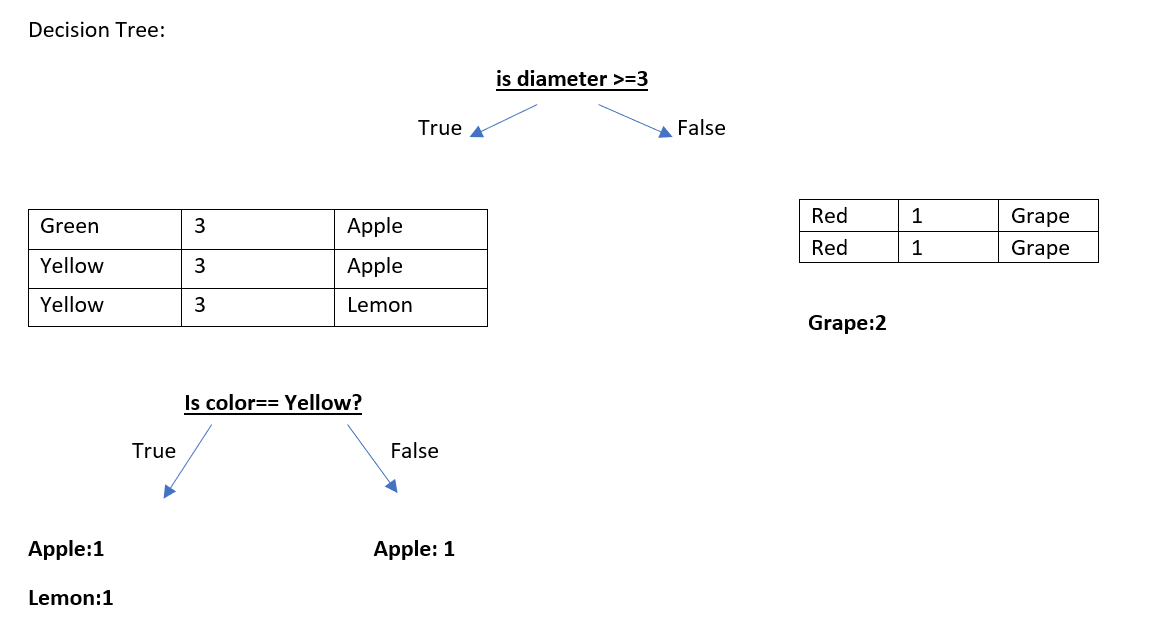

In [107]:
from IPython.display import Image
Image(filename='Decision Tree.png')

In [108]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [109]:

def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [111]:
# Evaluate
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]


for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}
